In [3]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import math

countries = ['AT', 'BE', 'CZ', 'DE_LU', 'FR', 'HR', 'HU', 'NL', 'PL', 'RO', 'SI', 'SK']

gen_types = [
    'biomass', 'brown_coal', 'coal_gas', 'natural_gas', 'hard_coal', 'oil', 'hydro', 
    'nuclear', 'waste', 'other', 'solar', 'wind_onshore', 'wind_offshore', 'other_renewable'
]

In [4]:
def visualise_cost_curve(zone, tech):
    df_coeffs = pd.read_excel("./optimisation/cost_coefficients_wo_np.xlsx", sheet_name=zone)
    df_capacities = pd.read_excel("./optimisation/data/installed_capacities.xlsx")
    df_fuel_prices = pd.read_excel("./optimisation/data/validation/fuel_prices.xlsx")

    cap_max = df_capacities.iloc[gen_types.index(tech)][zone]
    df_coeffs_tech = df_coeffs.iloc[gen_types.index(tech)]

    def c(x):
        if tech == 'brown_coal' or tech == 'coal_gas' or tech == 'hard_coal':
            return df_coeffs_tech.alpha + df_fuel_prices.iloc[0]['coal']/10 * (df_coeffs_tech.beta * x + df_coeffs_tech.gamma * x**2)
        elif tech == 'natural_gas':
            return df_coeffs_tech.alpha + df_fuel_prices.iloc[0]['gas']/10 * (df_coeffs_tech.beta * x + df_coeffs_tech.gamma * x**2)
        elif tech == 'oil':
            return df_coeffs_tech.alpha + df_fuel_prices.iloc[0]['oil']/10 * (df_coeffs_tech.beta * x + df_coeffs_tech.gamma * x**2)
        else:
            return df_coeffs_tech.alpha + (df_coeffs_tech.beta * x + df_coeffs_tech.gamma * x**2)

    x = np.linspace(0, cap_max, 100)

    """
    max_block_amount_per_tech = 30
    min_block_width = 5

    prices = []
    volumes = []
    positions = []

    block_width = math.floor(nl_gas_max/max_block_amount_per_tech)
    if block_width < 5:
        block_width = 5

    vol_pos = 0
    while vol_pos < nl_gas_max:
        next_pos = vol_pos + block_width
        if next_pos > nl_gas_max:
            next_pos = nl_gas_max
        calc_pos = (vol_pos + next_pos)/2
        volumes.append(next_pos - vol_pos)
        prices.append(c(calc_pos))
        positions.append(round(calc_pos))
        vol_pos = next_pos
    """

    #plt.bar(positions, prices, width=550)
    plt.plot(x, c(x), color='red')
    plt.title("{0} cost curve of natural gas-based electricity generation".format(zone))
    plt.ylabel('Price [€]')
    plt.xlabel('Generation output (MWh)')
    plt.show()

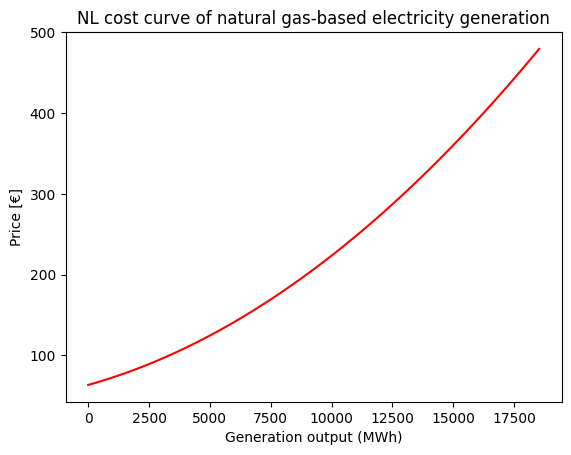

In [5]:
visualise_cost_curve('NL', 'natural_gas')